In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import os
from PIL import Image
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [4]:
df=pd.read_csv("indoor&outdoor_data.csv" , index_col=None)
df=df.drop("Unnamed: 0",axis=1)
df.head()

y=df['label']
x=df.drop('label',axis=1)


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train = X_train.values.reshape(-1,50,50,1)
X_test = X_test.values.reshape(-1,50,50,1)


In [19]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense ,Softmax



def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
    # create model
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(50, 50, 1), kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling2D())

    #Fully connected final layer
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return model

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       1

In [59]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test),
                    epochs=40, batch_size=30, verbose=1, callbacks=[checkpointer])
model.save(
    'my_model.h5',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

Epoch 1/40
51/52 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9948
Epoch 00001: val_loss improved from inf to 0.25981, saving model to weights.hdf5
52/52 [==============================] - 3s 67ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.2598 - val_accuracy: 0.9249
Epoch 2/40
51/52 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9941
Epoch 00002: val_loss did not improve from 0.25981
52/52 [==============================] - 3s 63ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.3473 - val_accuracy: 0.9041
Epoch 3/40
52/52 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9942
Epoch 00003: val_loss did not improve from 0.25981
52/52 [==============================] - 3s 65ms/step - loss: 0.0144 - accuracy: 0.9942 - val_loss: 0.3476 - val_accuracy: 0.9326
Epoch 4/40
51/52 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 0.9935
Epoch 00004: val_loss did not improve from 0.25981


Epoch 31/40
51/52 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9954
Epoch 00031: val_loss did not improve from 0.25981
52/52 [==============================] - 3s 64ms/step - loss: 0.0078 - accuracy: 0.9955 - val_loss: 0.3730 - val_accuracy: 0.9301
Epoch 32/40
51/52 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9954 ETA: 0s - loss: 0.0153 - accuracy: 
Epoch 00032: val_loss did not improve from 0.25981
52/52 [==============================] - 3s 64ms/step - loss: 0.0214 - accuracy: 0.9942 - val_loss: 0.4061 - val_accuracy: 0.9378
Epoch 33/40
51/52 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9922
Epoch 00033: val_loss did not improve from 0.25981
52/52 [==============================] - 3s 63ms/step - loss: 0.0219 - accuracy: 0.9922 - val_loss: 0.3130 - val_accuracy: 0.9171
Epoch 34/40
51/52 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9961
Epoch 00034: val_loss did not improve fro

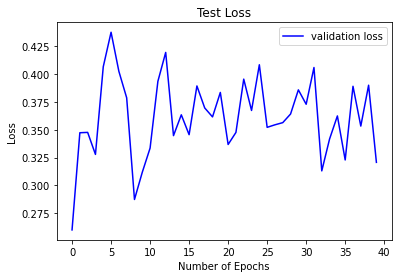

In [60]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [61]:
img = Image.open("E:/datasets/indoor&outdoor/test/image_1_1_19.png").convert("L")
img = img.resize((50,50),Image.ANTIALIAS)
img = np.asarray(img)/255.0 
img=img.reshape(-1,50,50,1)
print(img.shape)

(1, 50, 50, 1)


In [65]:

print(img[0][0][0])
Y_pred=model.predict(img)
print(Y_pred)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
if int(Y_pred_classes[0]) == 1 :
    print("indoor image")
elif int(Y_pred_classes[0]) == 0 :
    print("outdoor image")

[0.37647059]
[[1.00000e+00 1.80207e-11]]
outdoor image


In [63]:
class_predictions=['outdoor' , 'indoor']
pred = model.predict(img)
score = Softmax(pred[0])

class_prediction = class_predictions[np.argmax(pred)]
class_prediction

'outdoor'

In [64]:
print(pred)
print(score)
print(class_prediction)

[[1.00000e+00 1.80207e-11]]
outdoor
